
#**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2025**

---

# Datos y Modelos


In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

#seaborn.set_context('talk')
pd.set_option('display.float_format', '{:.2f}'.format)

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [ ]:
url = 'https://raw.githubusercontent.com/DiploDatos/AnalisisyVisualizacion/refs/heads/master/sysarmy_survey_2025_processed.csv'
df = pd.read_csv(url)

In [ ]:
df[:3]

,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
0,0,Ciudad Autónoma de Buenos Aires,Part-Time,Staff (planta permanente),6500000.00,5800000.00,Cobro parte del salario en dólares,NaN,De uno a tres sueldos,Performance de la compañía,...,NaN,NaN,NaN,NaN,45,Hombre Cis,Sí,True,Senior,6500000.00
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000.00,10200000.00,Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.00,Bruto,32,Mujer Cis,Sí,True,Senior,12700000.00
2,2,Córdoba,Full-Time,Staff (planta permanente),3952805.00,3137662.00,Cobro parte del salario en dólares,985,No,No recibo bono,...,NaN,NaN,NaN,NaN,29,Hombre Cis,Sí,True,Semi-Senior,3952805.00


# Estadística descriptiva

Hemos estado organizando y visualizando los datos de distintas maneras, pero ¿qué intuiciones podemos obtener?

Las visualizaciones como histogramas o gráficos de conteo muestran la cantidad de veces que se observa cada valor en un conjunto de realizaciones de una variable aleatoria. Esto se denomina análisis de frecuencia, y es parte de la **estadística descriptiva**.

El uso de visualizaciones nos limita a estimaciones, pero los datos crudos son demasiado como para intepretarlos en conjunto. Para eso, la estadística descriptiva provee también medidas de tendencia central y de dispersión, que resumen en un valor numérico propiedades de las realizaciones de la variable.

Retomemos el problema original con la v.a. `salary_monthly_BRUTO`, ¿qué información brindan las siguientes métricas y cómo usarlas?


In [ ]:
salary_col='salary_monthly_BRUTO'
#salary_col='salary_monthly_NETO'
df2= df[df[salary_col] < 15000000]
print('Máximo',max(df2[salary_col]),'Mínimo',min(df2[salary_col]))

Máximo 13500000.0 Mínimo 150000.0


In [ ]:
df2[salary_col].describe().apply(lambda s: '{0:.2f}'.format(s))

,salary_monthly_BRUTO
count,5196.00
mean,2728422.73
std,1780241.38
min,150000.00
25%,1500000.00
50%,2290000.00
75%,3500000.00
max,13500000.00


In [ ]:
print('{0:.2f}'.format(df2['salary_monthly_NETO'].mean()))

2295041.00


## Medidas de tendencia central

Cuando se quiere obtener un valor representativo de todas las realizaciones de una v.a., o su centro, se utiliza una *medida de tendencia central*.

Repasando, dada una característica de interés (modelada por X v.a.) y un conjunto de observaciones $x = \{ x_1, x_2 ... \}$ donde $x_i = X(\omega_i)$ para algún $\omega_i \in \Omega$, y $N = |x|$:

* La **media muestral** (aritmética) o promedio se calcula como:

$$ \bar{x} = \frac{1}{N} \sum_i^N x_i $$

* La **mediana** se calcula:
  1. Ordenar las realizaciones tal que $x_j \leq x_{j+1}$
  2. Si la cantidad de datos $N$ es impar, la mediana es el valor central: $median = x_{\lfloor N / 2 \rfloor +1}$
  3. Si la cantidad de datos $N$ es par, la mediana es e promedio de los dos valores centrales: $median = \frac{1}{2} (x_{ N / 2 } + x_{ (N / 2) +1})$

* La **moda** son los valores o él valor con mayor frecuencia, es decir, los o él que más se repite.


In [ ]:
print('media','{0:.2f}'.format(df2[salary_col].mean()))
print('mediana','{0:.2f}'.format(df2[salary_col].median()))

media 2728422.73
mediana 2290000.00


**¿Por qué las dos medidas son tan distintas?**

* La media se puede interpretar como el *centro de masa* del histograma. Es decir, si el histograma fuera una figura de madera, el punto de equilibrio donde podemos apoyarlo y no se cae es la media.
* La media es muy sensible a valores extremos.
* La mediana es más robusta a valores extremos.
* Si la distribución de los datos es simétrica, las medidas coinciden. (Luego, si no coinciden es porque la distribución no es simétrica)

**¿Se cumple para estos datos?**

In [ ]:
salary_col='salary_monthly_BRUTO'

max_salaries = [df2[salary_col].max(), 10**7, 5000000, 4000000, 3000000, 2000000]
central_tendency = [
    (max_salary, df2[df2[salary_col] < max_salary][salary_col].mean(),
     df2[df2[salary_col] < max_salary][salary_col].median())
    for max_salary in max_salaries
]
# Iterate through the central_tendency list and format individual elements
for item in central_tendency:
    print("Max Salary: {0:.2f}, Mean: {1:.2f}, Median: {2:.2f}".format(item[0], item[1], item[2]))

Max Salary: 13500000.00, Mean: 2726349.28, Median: 2290000.00
Max Salary: 10000000.00, Mean: 2671114.82, Median: 2266950.00
Max Salary: 5000000.00, Mean: 2259790.13, Median: 2100000.00
Max Salary: 4000000.00, Mean: 2039391.62, Median: 1989000.00
Max Salary: 3000000.00, Mean: 1733631.90, Median: 1720000.00
Max Salary: 2000000.00, Mean: 1315682.04, Median: 1355236.00


Se pueden graficar estos números para lograr una mejor intuición de la magnitud de las diferencias. Además, al mostrar una visualización se pueden incluir más puntos.

Para poder crear gráficos de seaborn con distintos grupos de datos, muchas veces es necesario cambiar el formato del dataframe de wide a long. Ver [este link](https://anvil.works/blog/tidy-data) para más información.

In [ ]:
central_tendency_max = [
    (max_salary, df2[df2[salary_col] < max_salary][salary_col].mean(),
     df2[df2[salary_col] < max_salary][salary_col].median())
    for max_salary in range(1500000, int(df2[salary_col].max()), 10**6)
]
central_tendency_max_df = pd.DataFrame(central_tendency_max,
                                   columns=['max_salary', 'mean', 'median'])\
  .melt(id_vars='max_salary', var_name='metric')

print(central_tendency_max_df)

    max_salary  metric      value
0      1500000    mean 1032764.28
1      2500000    mean 1547309.86
2      3500000    mean 1904297.33
3      4500000    mean 2163076.75
4      5500000    mean 2348302.86
5      6500000    mean 2469639.16
6      7500000    mean 2562873.32
7      8500000    mean 2625027.82
8      9500000    mean 2666981.11
9     10500000    mean 2691075.34
10    11500000    mean 2702086.82
11    12500000    mean 2714521.47
12     1500000  median 1086520.50
13     2500000  median 1598063.00
14     3500000  median 1874454.50
15     4500000  median 2000000.00
16     5500000  median 2140415.00
17     6500000  median 2200000.00
18     7500000  median 2200009.00
19     8500000  median 2244028.00
20     9500000  median 2260000.00
21    10500000  median 2280147.57
22    11500000  median 2287000.00
23    12500000  median 2289157.00


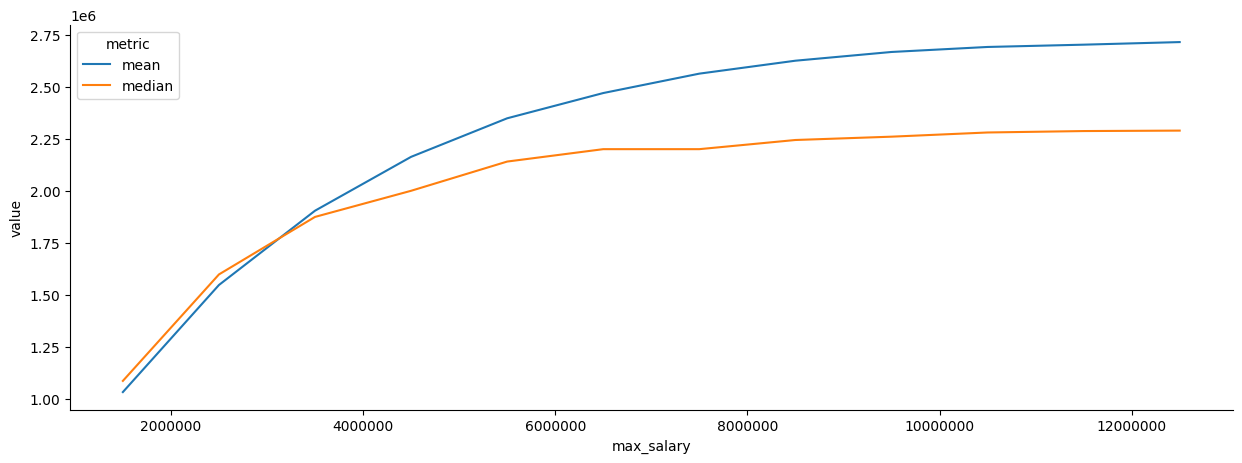

In [ ]:
# ¡Podemos ver estos datos visualmente! valga la redundancia!!
fig = plt.figure(figsize=(15, 5))
seaborn.lineplot(data=central_tendency_max_df, x='max_salary', y='value', hue='metric')
plt.ticklabel_format(style='plain', axis='x')
seaborn.despine()

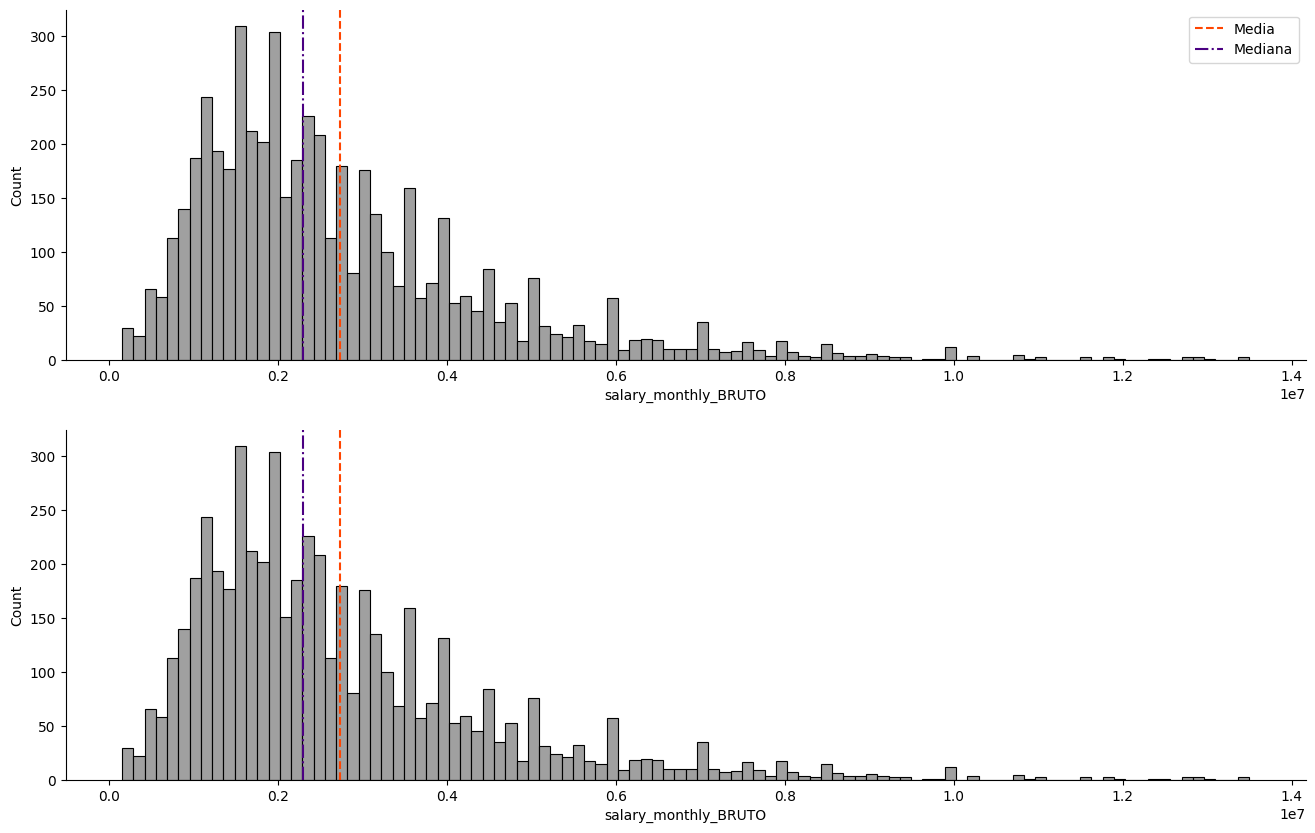

In [ ]:
## La diferencia no siempre se aprecia en los gráficos
fig, axes = plt.subplots(nrows=2, figsize=(16, 10))

seaborn.histplot(df[salary_col], bins=100, ax=axes[0], color='gray')
axes[0].axvline(df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[0].axvline(df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')


filtered_df = df[df[salary_col] < 15000000]
seaborn.histplot(filtered_df[salary_col], bins=100, ax=axes[1], color='gray')
axes[1].axvline(filtered_df[salary_col].mean(), color='orangered',
            linestyle='--', label='Media')
axes[1].axvline(filtered_df[salary_col].median(), color='indigo',
            linestyle='-.', label='Mediana')

axes[0].legend()
seaborn.despine()

¿Qué decir de la moda?

In [ ]:
df.profile_gender.mode()

,profile_gender
0,Hombre Cis


In [ ]:
df.profile_gender.describe()

,profile_gender
count,5194
unique,8
top,Hombre Cis
freq,4083


In [ ]:
df.profile_age.describe()

,profile_age
count,5196.00
mean,36.57
std,45.32
min,19.00
25%,29.00
50%,35.00
75%,41.00
max,3040.00


## Medidas de dispersión

Las medidas de dispersión vistas en el teórico son la desviación estándar, la varianza, y el coeficiente de variación. También permiten representar con un número alguna propiedad de los datos.

Por ejemplo, comparemos el salario neto con el salario bruto. A priori, **¿deberíamos ver alguna diferencia?**

In [ ]:
df[['salary_monthly_NETO', 'salary_monthly_BRUTO']].describe().map(lambda x: round(x, 2))

,salary_monthly_NETO,salary_monthly_BRUTO
count,4951.00,5196.00
mean,10725497332.62,2728422.73
std,754512234786.43,1780241.38
min,4.00,150000.00
25%,1288264.50,1500000.00
50%,1916958.00,2290000.00
75%,2893500.00,3500000.00
max,53090005379000.00,13500000.00


In [ ]:
df[df['salary_monthly_NETO'] < 15000000].describe().map(lambda x: round(x, 2))

,Unnamed: 0,salary_monthly_BRUTO,salary_monthly_NETO,salary_percentage_inflation_adjustment,salary_comparison_last_semester,salary_satisfaction,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,company_days_in_the_office,company_recommended,tools_copilotchatgpt,salary_on_call_duty_charge,profile_age,_sal
count,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,4943.00,1609.00,4943.00,4943.00
mean,2718.74,2706381.84,2295041.00,2083.49,2.57,2.55,8.76,3.83,3.22,2.10,0.82,6.64,3.10,13921.39,36.59,2706381.84
std,1531.94,1764860.91,1550875.92,142233.66,0.86,0.87,7.69,5.03,6.85,8.04,1.21,2.76,1.55,87662.15,45.96,1764860.91
min,0.00,150000.00,4.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,19.00,150000.00
25%,1397.50,1500000.00,1284054.00,8.00,2.00,2.00,3.00,1.00,1.00,0.00,0.00,5.00,2.00,0.00,29.00,1500000.00
50%,2751.00,2257000.00,1907000.00,39.00,3.00,3.00,6.00,2.00,2.00,0.00,0.00,7.00,3.00,0.00,35.00,2257000.00
75%,4046.50,3456616.50,2870341.50,100.00,3.00,3.00,13.00,4.00,4.00,1.00,1.00,8.00,4.00,0.00,41.00,3456616.50
max,5324.00,13500000.00,13500000.00,9999999.00,4.00,4.00,46.00,90.00,412.00,200.00,5.00,10.00,5.00,1500000.00,3040.00,13500000.00


Claramente, ambas distribuciones están centradas en valores distintos, pero ¿podemos decir algo sobre su dispersión?

Cuando se comparan dos características diferentes (que pueden tener magnitudes diferentes) puede no ser conveniente comparar directamente los valores de las desviaciones estándar, sino que podemos usar el coeficiente de variación (desviación estándar dividida la media).

In [ ]:
import scipy

df2= df[df['salary_monthly_NETO'] < 15000000]


print("Coeficiente de variación salario bruto es ",
      scipy.stats.variation(df.salary_monthly_BRUTO))
print("Coeficiente de variación salario neto es",
      scipy.stats.variation(df.salary_monthly_NETO.dropna()))
print("Coeficiente de variación salario bruto <15.000.000 es ",
      scipy.stats.variation(df2.salary_monthly_BRUTO))
print("Coeficiente de variación salario neto<15.000.000 es ",
      scipy.stats.variation(df2.salary_monthly_NETO.dropna()))



Coeficiente de variación salario bruto es  0.6524172542238429
Coeficiente de variación salario neto es 70.34042427851855
Coeficiente de variación salario bruto <15.000.000 es  0.6520448635725439
Coeficiente de variación salario neto<15.000.000 es  0.6756824986655977


## Percentiles y gráficos de caja

Los gráficos de caja son otra forma de representar la distribución de las realizaciones de una v.a. numérica, de una forma más condensada que un histograma.

Son muy útiles para comparar muchas distribuciones, pero sólo cuando son muy distintas entre ellas, ya que oscurecen algunas sutilezas. Otros problema de este tipo de gráficos es que *no todo el mundo recuerda cómo leerlos*.

En estadística descriptiva, un gráfico de caja es un método para representar gráficamente grupos de datos numéricos a través de sus cuartiles. Los gráficos de caja también pueden tener líneas que se extienden verticalmente desde las cajas (bigotes) indicando la variabilidad fuera de los cuartiles superior e inferior. Los valores atípicos pueden representarse como puntos individuales.

La definición anterior sugiere que, si hay un valor atípico, se representará como un punto en el diagrama de caja, mientras que el resto de los datos de la muestra se agrupará y se mostrará en forma de cajas. Intentemos verlo nosotros mismos.
<center>
<img src="https://miro.medium.com/max/1400/1*2c21SkzJMf3frPXPAR_gZA.png" height="300" />
</center>

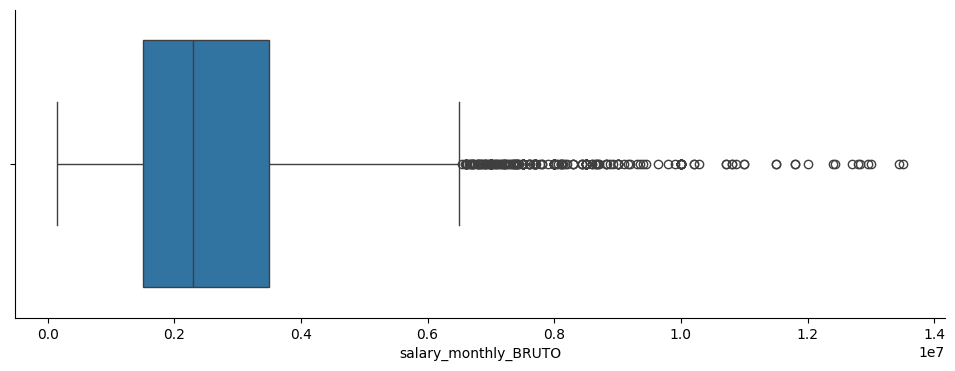

In [ ]:
salary_col='salary_monthly_BRUTO'

plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[df[salary_col]<15000000][salary_col])
seaborn.despine()

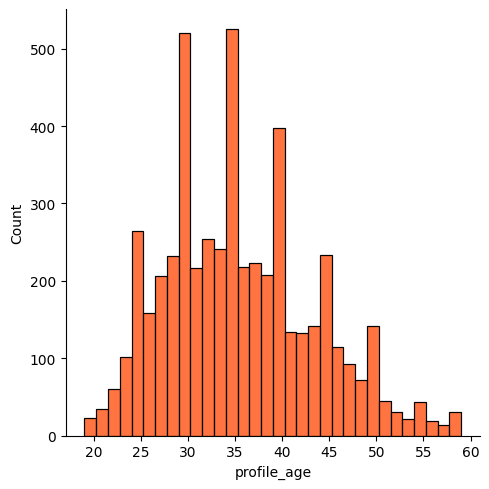

In [ ]:
seaborn.displot(x=df[df.profile_age < 60].profile_age,color='orangered')

<Axes: xlabel='profile_age'>

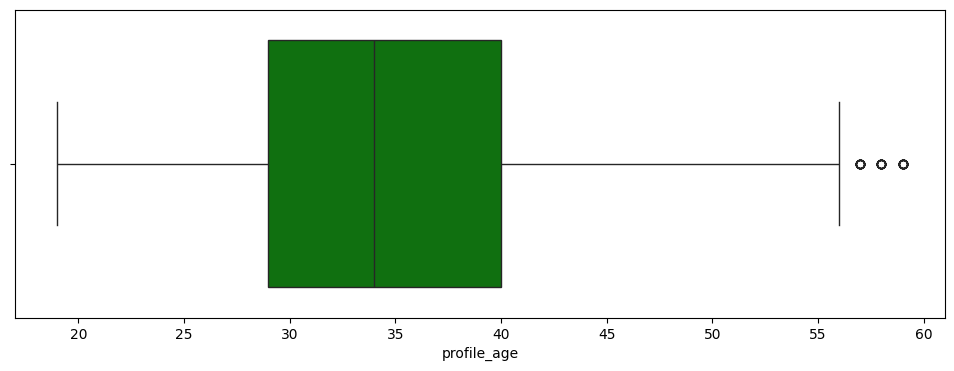

In [ ]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df[df.profile_age < 60].profile_age, color='green')

Por ejemplo, podemos comparar la distribución de los salarios netos con respecto al nivel de estudios alcanzado.

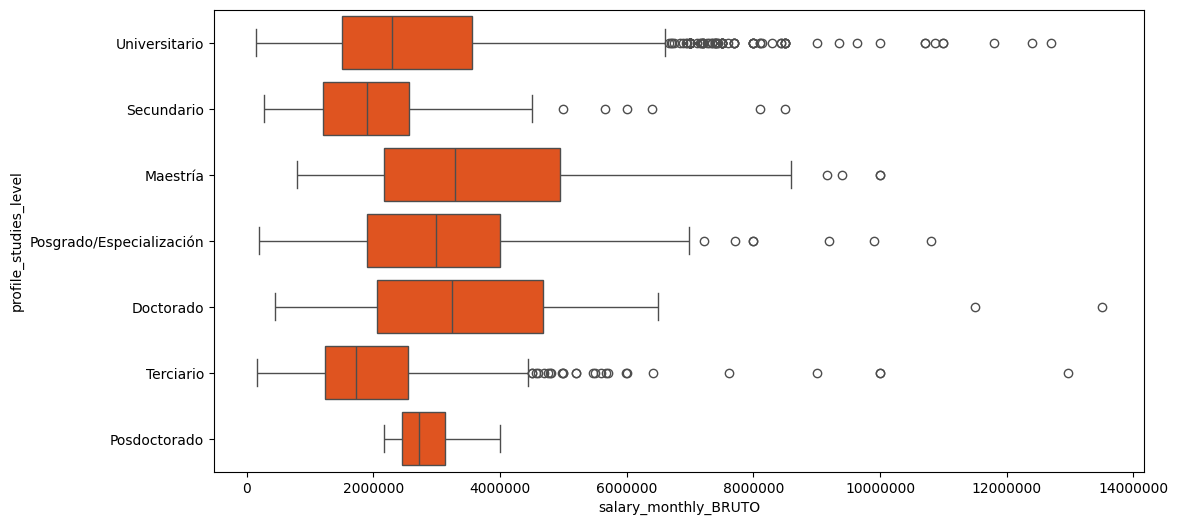

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [ ]:
df['profile_studies_level'].describe()

,profile_studies_level
count,2474
unique,7
top,Universitario
freq,1639


### Boxenplots

Los boxplots tienen una gran desventaja: ocultan mucha información en la distribución de las colas. Por ejemplo, para la categoría Secuendario, sabemos que el 25% de los valores de sueldo neto es mayor que los ~1.000.000 pesos. Pero no conocemos cómo se distribuyen. Para conjuntos de datos de gran tamaño, el 25% de los datos contiene mucha información.

Un gráfico más informativo es el **boxenplot**, que visualiza más percentiles. Otra ventaja es la percepción del mismo debido al peso visual de las cajas: los datos en el rango intercuartílico no parecen muuuucho más importantes que los datos en las colas.

Sin embargo, es aún más difícil de leer si buscamos exactitud, ya que los percentiles que definen el límite de cada caja se definen recursivamente y no decrecen linealmente.
**Tarea: averiguar en que consisten**

https://vita.had.co.nz/papers/letter-value-plot.pdf

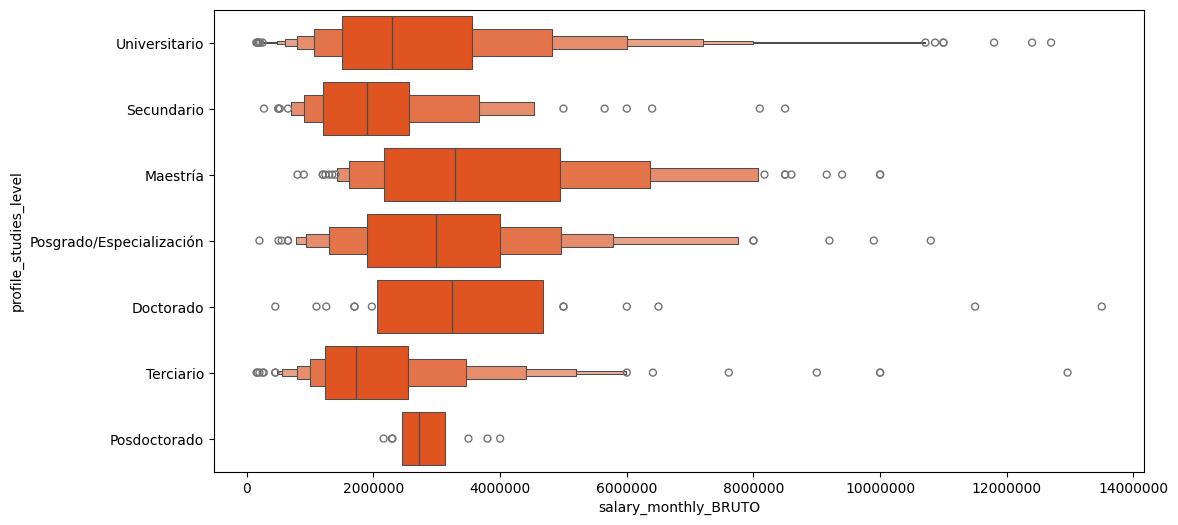

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxenplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

### Violinplots

Los gráficos de violin combinan los boxplot con estimación de densidad usando Kernel Density Estimation. Este enfoque utiliza KDE para proporcionar una descripción más rica de la distribución de valores. Además, los valores de cuartil y bigote del diagrama de caja se muestran dentro del violín. La desventaja es que, debido a que violinplot usa KDE, hay algunos otros parámetros que pueden necesitar ajustes, agregando cierta complejidad en relación con el sencillo diagrama de caja:

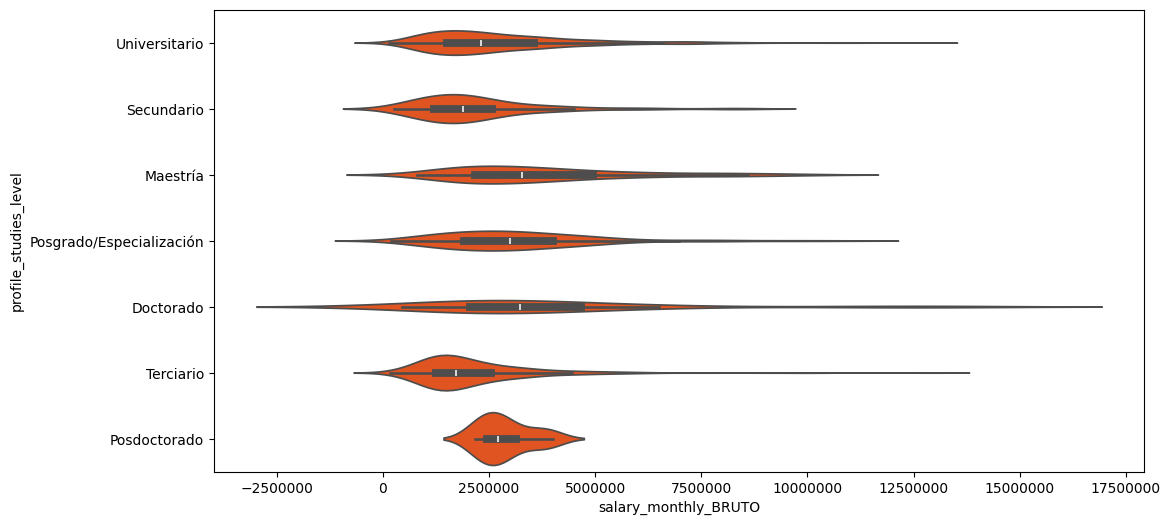

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.violinplot(data=df, x=salary_col, y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

## Eliminación de valores extremos

### Usando percentiles

Una forma conservadora de eliminar valores extremos que estén afectando a la media, el rango y las visualizaciones es seleccionar un cierto porcentaje más extremo. Para eso, usamos los percentiles.

Por ejemplo, podemos elegir quedarnos con el 99% de salarios más bajos, eliminando el 1%. Podemos calcular todos los percentiles para decidir cuál sería el más apropiado.

In [ ]:
k = 90
percentile_90 = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_90])
n_above = len(df[df[salary_col] > percentile_90])
print('Percentil {} de la columna {}: {}'.format(k, salary_col, percentile_90))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

Percentil 90 de la columna salary_monthly_BRUTO: 5000000.0
% de datos menor que percentil 90: 0.8933795227097767
% de datos mayor que percentil 90: 0.09545804464973057


Que pasa con salary_monthly_NETO?

In [ ]:
k = 90
salary_col='salary_monthly_NETO'
percentile_90 = df[salary_col].quantile(k / 100)
n_below = len(df[df[salary_col] < percentile_90])
n_above = len(df[df[salary_col] > percentile_90])
print('Percentil {} de la columna {}: {}'.format(k, salary_col, percentile_90))
print('% de datos menor que percentil {}: {}'.format(k, n_below / len(df)))
print('% de datos mayor que percentil {}: {}'.format(k, n_above / len(df)))

Percentil 90 de la columna salary_monthly_NETO: 4124297.0
% de datos menor que percentil 90: 0.8573903002309469
% de datos mayor que percentil 90: 0.09526558891454966


Existe valores esporádicos enormes en salario NETO que no estan en salario BRUTO y eso cambia la distribución...

Volvamos a ver el salario bruto

In [ ]:
salary_col='salary_monthly_BRUTO'

df[salary_col].quantile([.95, .98, .99, .995, .998])

,salary_monthly_BRUTO
0.95,6262500.00
0.98,7910000.00
0.99,8835331.00
0.99,10000000.00
1.00,11800000.00


<Axes: xlabel='salary_monthly_BRUTO'>

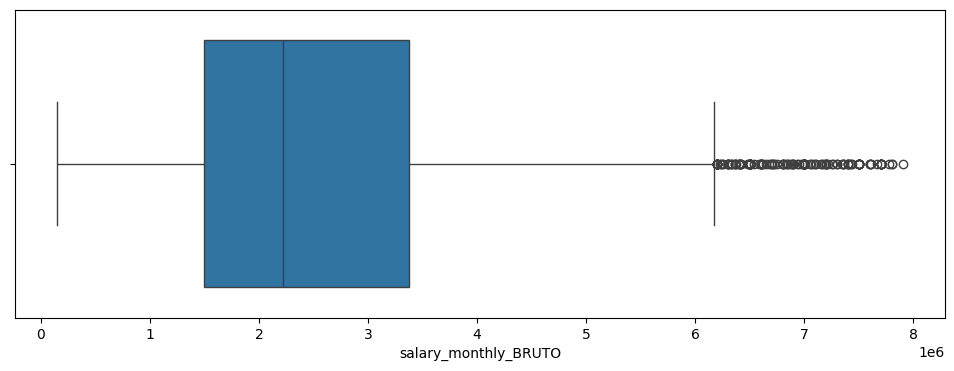

In [ ]:
plt.figure(figsize=(12, 4))
max_limit = df[salary_col].quantile(.98)
seaborn.boxplot( x=df[df[salary_col] < max_limit][salary_col])

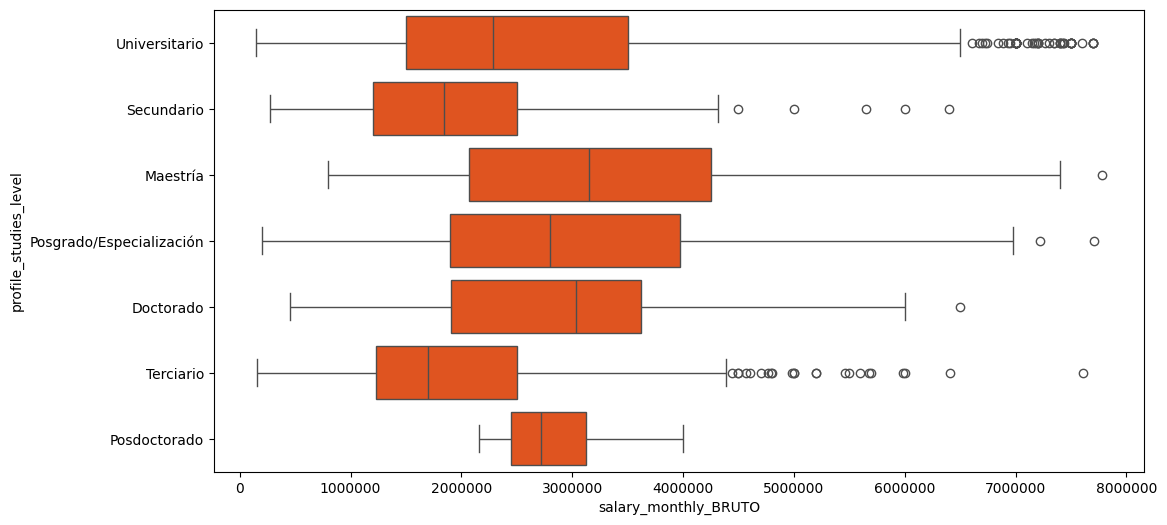

In [ ]:
plt.figure(figsize=(12, 6))
seaborn.boxplot(data=df, x=df[df[salary_col] < max_limit][salary_col], y='profile_studies_level',
                color='orangered')
plt.ticklabel_format(style='plain', axis='x')

<Axes: xlabel='salary_monthly_BRUTO'>

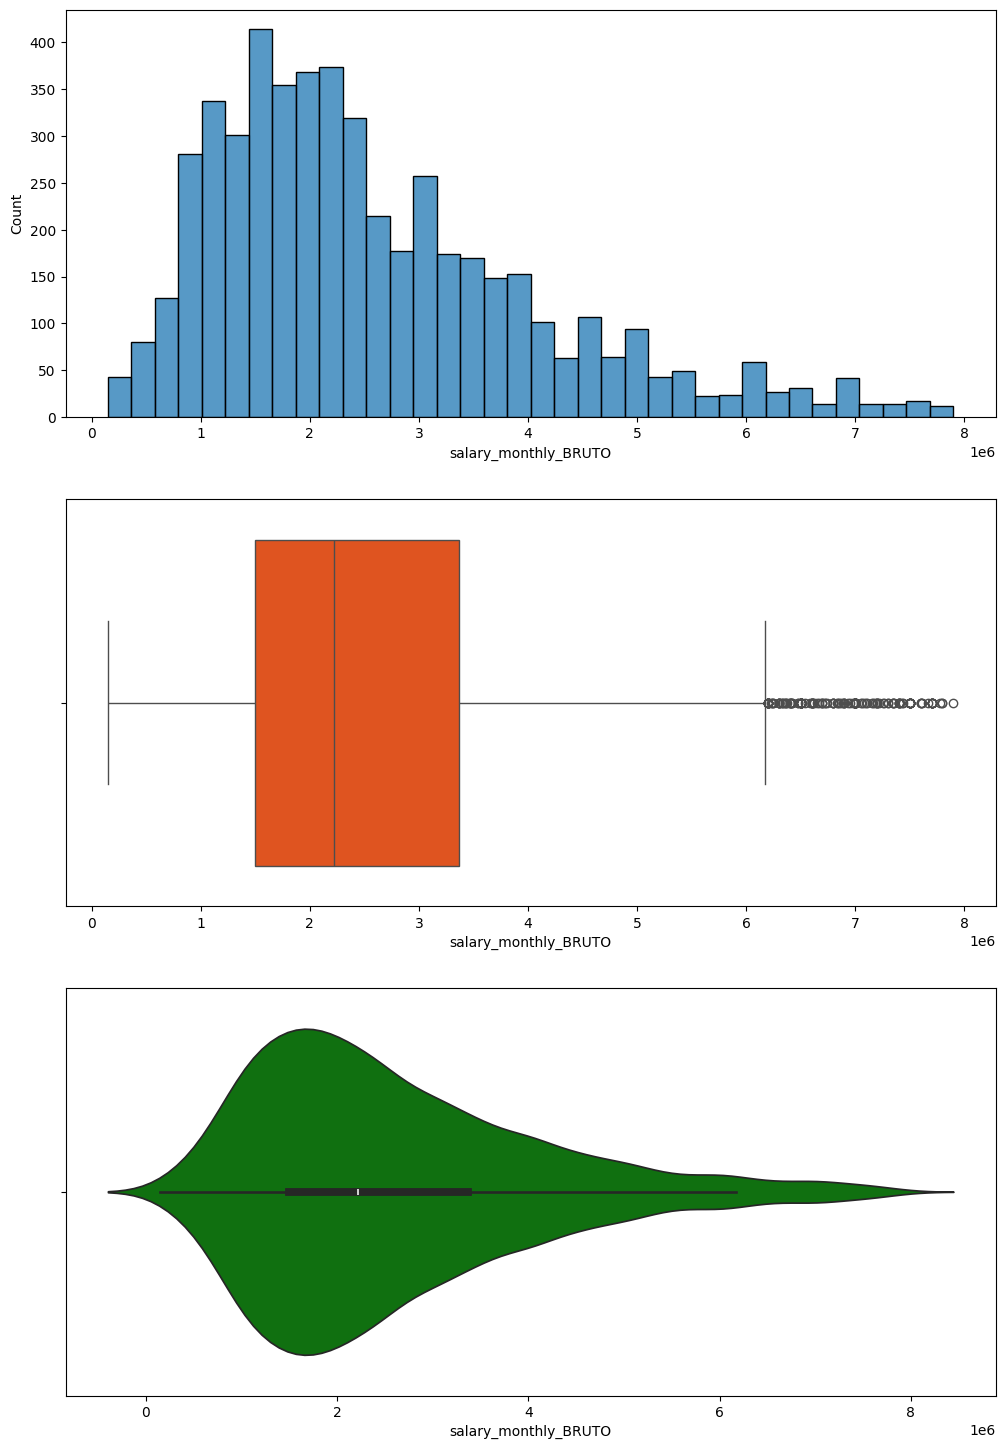

In [ ]:
fig, axes = plt.subplots(figsize=(12, 18), nrows=3)
max_limit = df[salary_col].quantile(.98)
data = df[df[salary_col] < max_limit][salary_col]

seaborn.histplot(x=data, ax=axes[0])
seaborn.boxplot(x=data, color='orangered',ax=axes[1])
seaborn.violinplot(x=data, color='green',ax=axes[2])

### Rango itercuartílico

In [ ]:
def clean_outliers_q3(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (interesting_col <= (2.5 * interesting_col.quantile(.75)))
    return dataset[mask_outlier]

<Axes: xlabel='salary_monthly_BRUTO', ylabel='Count'>

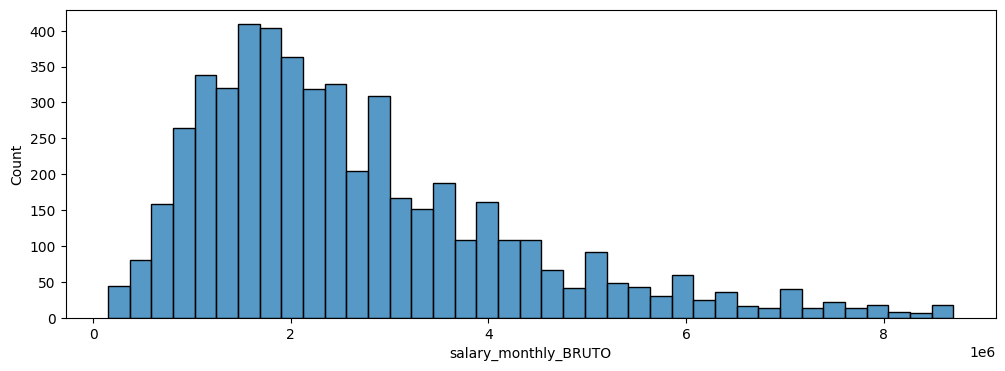

In [ ]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_q3(df, salary_col)[salary_col]
seaborn.histplot(x=data)

In [ ]:
def clean_outliers_sd(dataset, column_name):
    """Returns dataset removing the outlier rows from column @column_name."""
    interesting_col = dataset[column_name]
    # Here we can remove the outliers from both ends, or even add more restrictions.
    mask_outlier = (
        numpy.abs(interesting_col - interesting_col.mean()) <=
        (2.5 * interesting_col.std()))
    return dataset[mask_outlier]

<Axes: xlabel='salary_monthly_BRUTO', ylabel='Count'>

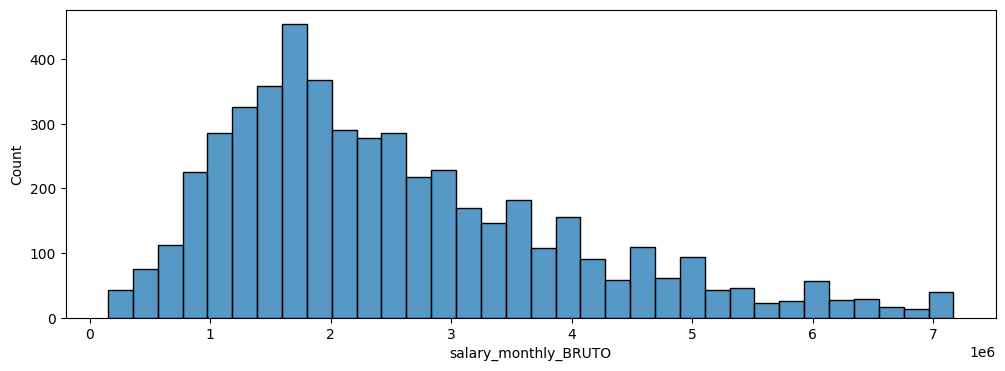

In [ ]:
fig = plt.figure(figsize=(12, 4))
data = clean_outliers_sd(df, salary_col)[salary_col]
seaborn.histplot(x=data)

**REHACER CON 'salary_monthly_NETO'**

### ¡Mirando los datos!

¿Quiénes son los que cobran tanto?

In [ ]:
len(df[df[salary_col] > df[salary_col].quantile(0.98)])

104

In [ ]:
df_filtrada=df[df[salary_col] > df[salary_col].quantile(0.98)]
df[df[salary_col] > df[salary_col].quantile(0.98)]


,Unnamed: 0,work_province,work_dedication,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_last_dollar_value,salary_has_bonus,salary_bonus_tied_to,...,salir_o_seguir_contestando_sobre_las_guardias,work_on_call_duty,salary_on_call_duty_charge,aclara_el_numero_que_ingresaste_en_el_campo_anterior,profile_age,profile_gender,habias_respondido_nuestra_encuesta_en_ediciones_anteriores,sueldo_dolarizado,seniority,_sal
1,1,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,12700000.00,10200000.00,Cobro todo el salario en dólares,NaN,Un sueldo,Performance de la compañía,...,Terminar encuesta,No,0.00,Bruto,32,Mujer Cis,Sí,True,Senior,12700000.00
44,46,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),10000000.00,10000000.00,Cobro todo el salario en dólares,1100,De uno a tres sueldos,Performance individual,...,NaN,NaN,NaN,NaN,37,Hombre Cis,Sí,True,Senior,10000000.00
58,62,Buenos Aires,Full-Time,Staff (planta permanente),8500000.00,5000000.00,Cobro todo el salario en dólares,1100,Menos de un sueldo,Performance de la compañía,...,NaN,NaN,NaN,NaN,40,Hombre Cis,Sí,True,Senior,8500000.00
60,64,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,10000000.00,10000000.00,Cobro todo el salario en dólares,1100,Menos de un sueldo,Performance de la compañía,...,Responder sobre guardias,No,0.00,Porcentaje de mi sueldo bruto,39,Hombre Cis,Sí,True,Senior,10000000.00
92,97,Ciudad Autónoma de Buenos Aires,Full-Time,Contractor,8000000.00,NaN,Cobro todo el salario en dólares,Pago en dolares,No,No recibo bono,...,NaN,NaN,NaN,NaN,37,Hombre Cis,Sí,True,Senior,8000000.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,4868,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),8600000.00,7000000.00,NaN,NaN,3+ sueldos,Mix de las anteriores,...,NaN,NaN,NaN,NaN,40,Hombre Cis,Sí,False,Senior,8600000.00
4838,4964,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),8000000.00,6500000.00,NaN,NaN,De uno a tres sueldos,Performance grupal,...,Terminar encuesta,NaN,NaN,NaN,41,Hombre Cis,Sí,False,Senior,8000000.00
4962,5090,Córdoba,Full-Time,Staff (planta permanente),8300000.00,6068000.00,NaN,NaN,Un sueldo,Mix de las anteriores,...,NaN,NaN,NaN,NaN,48,Hombre Cis,Sí,False,Senior,8300000.00
5047,5175,Ciudad Autónoma de Buenos Aires,Full-Time,Staff (planta permanente),8500000.00,5000000.00,NaN,NaN,De uno a tres sueldos,Performance de la compañía,...,Terminar encuesta,"Sí, pasiva",0.00,Porcentaje de mi sueldo bruto,36,Hombre Cis,Sí,False,Senior,8500000.00
